# Connectivity in species presence at Port Aransas and Surfside

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
dfpa = pd.read_csv('data/IFCB_portaransas_2017.csv', index_col=0, parse_dates=True)
dfss = pd.read_csv('data/IFCB_surfside_2017.csv', index_col=0, parse_dates=True)

In [6]:
pd.Series.autocorr?

/Users/kthyng/miniconda3/envs/cart/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


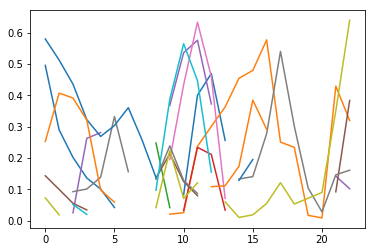

In [41]:
# upcoast
dt = 24  # 24 rows is one day, an hour per row
lags = np.arange(0,24*dt,dt)
pa2ss = np.zeros((dfpa.columns.size, lags.size))
for i, col in enumerate(dfpa.columns):
    pa2ss[i] = [dfpa[col].corr(dfss[col].shift(lag)) for lag in lags]
pa2ss[pa2ss<0] = np.nan
plt.plot(pa2ss.T);

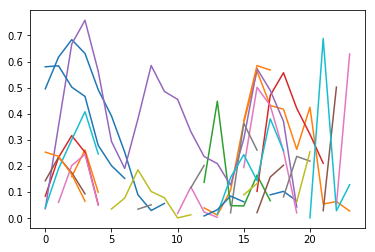

In [43]:
# upcoast
dt = 24  # 24 rows is one day, an hour per row
lags = np.arange(0,24*dt,dt)
ss2pa = np.zeros((dfss.columns.size, lags.size))
for i, col in enumerate(dfss.columns):
    ss2pa[i] = [dfss[col].corr(dfpa[col].shift(lag)) for lag in lags]
ss2pa[ss2pa<0] = np.nan
plt.plot(ss2pa.T);

In [54]:
import tabs
df = tabs.read('42019', dfpa.index[0], dfpa.index[-1])
df2 = tabs.read('8772985', dfpa.index[0], dfpa.index[-1])

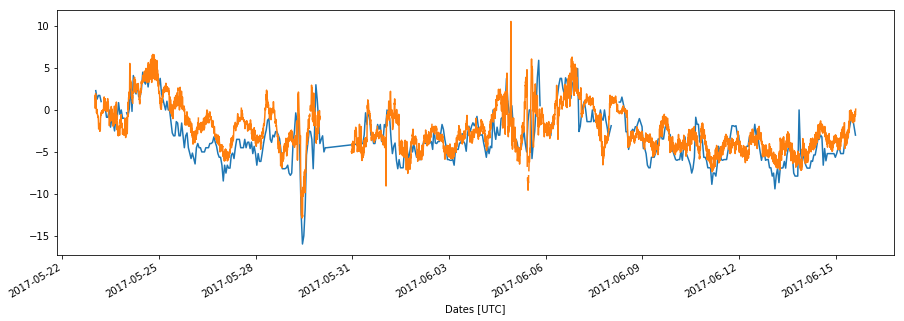

In [55]:
df['42019: East [m/s]'].plot(figsize=(15,5))
df2['8772985: East [m/s]'].plot()

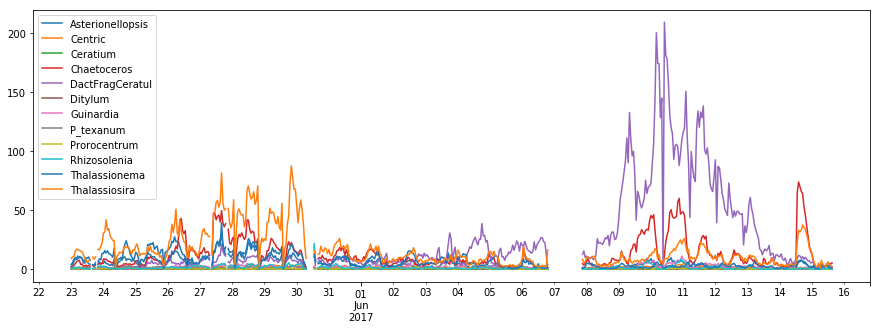

In [53]:
dfpa.plot(figsize=(15,5))#, color='k')

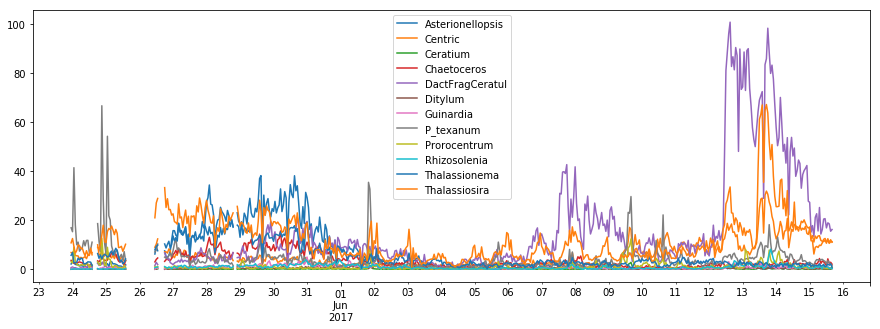

In [52]:
dfss.plot(figsize=(15,5))#, color='k')